- Implementar a Transformada de Fourier (Utilize a biblioteca de sua preferência)
- Implementar a Transformada Inversa de Fourier (Utilize a biblioteca de sua preferência)
- Plotar o espectro e fase.
- Comparar os resultados com ImageF.
- Plotar o espectro 3D (Pesquisar formas de visualização 3D em Python)
- Utilizar as imagens disponibilizadas na aula (Images_fourier.rar)
- Criar uma imagem fundo branco e um quadrado simulando a função SINC

In [ ]:
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from mpl_toolkits.mplot3d import Axes3D 

lena_cv = cv2.imread(r'..\images\len_periodic_noise.png', cv2.IMREAD_GRAYSCALE)
car_cv = cv2.imread(r'..\images\car.tif', cv2.IMREAD_GRAYSCALE)
woman_cv = cv2.imread(r'..\images\newspaper_shot_woman.tif', cv2.IMREAD_GRAYSCALE)
periodic_cv = cv2.imread(r'..\images\periodic_noise.png', cv2.IMREAD_GRAYSCALE)
sinc_cv = cv2.imread(r'..\images\sinc.png', cv2.IMREAD_GRAYSCALE)

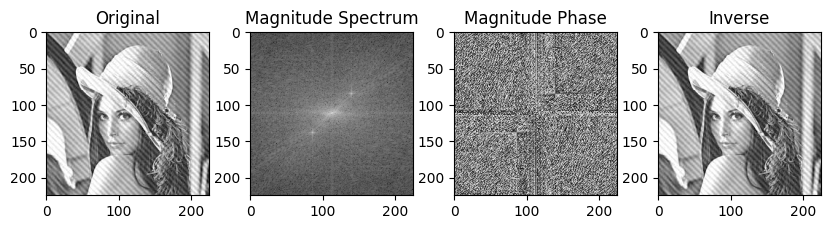

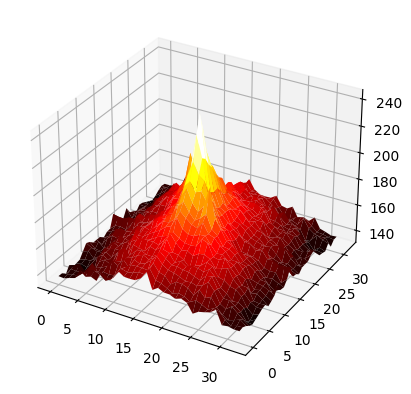

In [ ]:
def show_img(img_original, img_spectrum, img_fase, img_back):
    fig = plt.figure(figsize=(10, 5))
    plt1 = plt.subplot(1, 4, 1)
    plt2 = plt.subplot(1, 4, 2)
    plt3 = plt.subplot(1, 4, 3)
    plt4 = plt.subplot(1, 4, 4)
    plt1.title.set_text("Original")
    plt2.title.set_text('Magnitude Spectrum')
    plt3.title.set_text('Magnitude Phase')
    plt4.title.set_text('Inverse')
    plt1.imshow(img_original, cmap='gray')
    plt2.imshow(img_spectrum, cmap='gray')
    plt3.imshow(img_fase, cmap='gray')
    plt4.imshow(img_back, cmap='gray')
    plt.subplots_adjust(wspace=0.25)

def show_3d(img_magnitude):
    img = Image.fromarray(img_magnitude)      
    size = tuple((np.array(img.size) * 0.15).astype(int))
    img =  np.array(img.resize(size, Image.BICUBIC))
    
    # create the x and y coordinate arrays (here we just use pixel indices)
    xx, yy = np.mgrid[0:img.shape[0], 0:img.shape[1]]

    # create the figure
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(xx, yy, img ,rstride=1, cstride=1, cmap=plt.cm.hot,linewidth=0)

    # show it
    plt.show()

def ff(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_fase = np.angle(fshift)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.real(img_back)
    return magnitude_fase, magnitude_spectrum, img_back

lena_fase, lena_spectrum, lena_back = ff(lena_cv) 
show_img(lena_cv, lena_spectrum, lena_fase, lena_back)
show_3d(lena_spectrum)


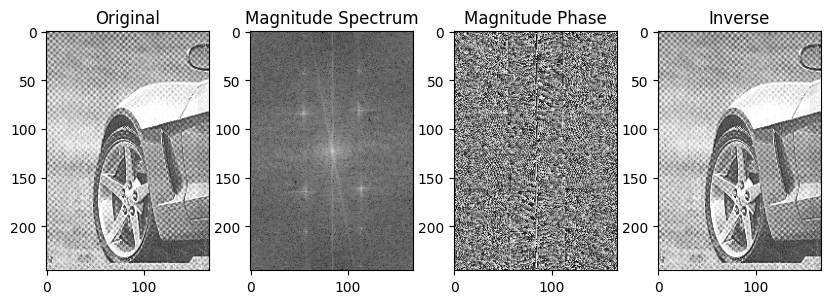

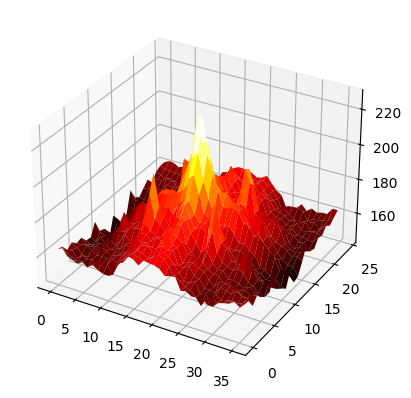

In [ ]:
car_fase, car_spectrum, car_back = ff(car_cv) 
show_img(car_cv, car_spectrum, car_fase, car_back)
show_3d(car_spectrum)


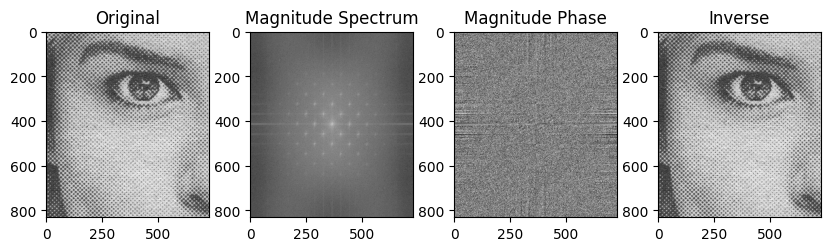

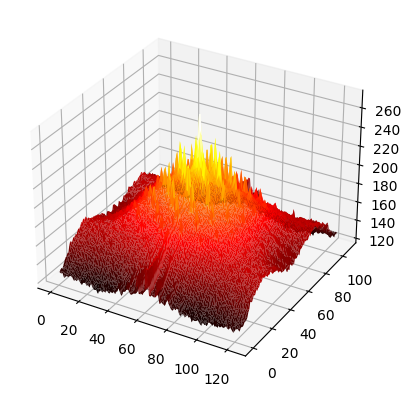

In [ ]:
woman_fase, woman_spectrum, woman_back = ff(woman_cv) 
show_img(woman_cv, woman_spectrum, woman_fase, woman_back)
show_3d(woman_spectrum)

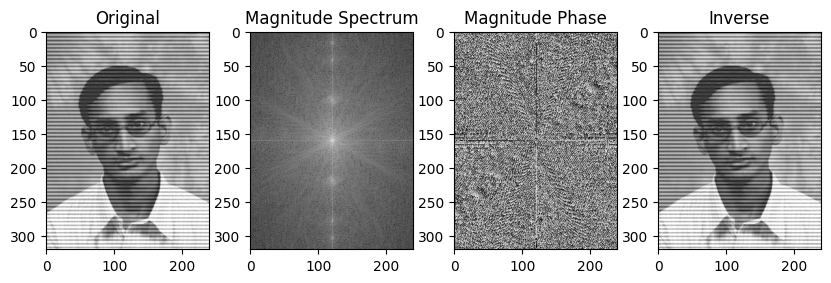

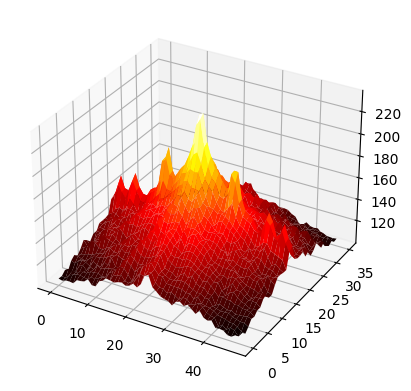

In [ ]:
periodic_fase, periodic_spectrum, periodic_back = ff(periodic_cv) 
show_img(periodic_cv, periodic_spectrum, periodic_fase, periodic_back)
show_3d(periodic_spectrum)

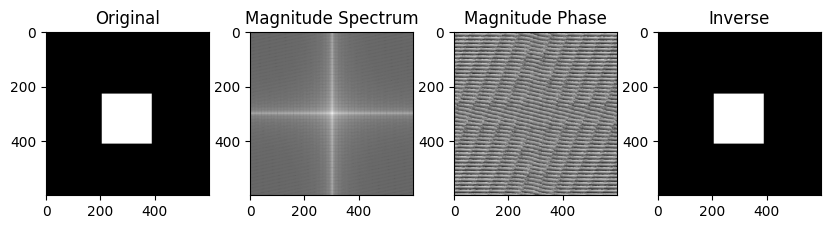

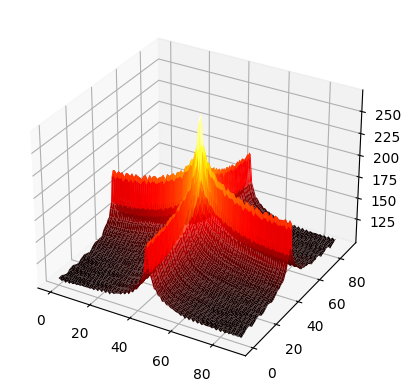

In [ ]:
sinc_fase, sinc_spectrum, sinc_back = ff(sinc_cv) 
show_img(sinc_cv, sinc_spectrum, sinc_fase, sinc_back)
show_3d(sinc_spectrum)